In [1]:
import ROOT

Welcome to JupyROOT 6.12/06


## Data

In [2]:
n = 500

In [3]:
h1 = ROOT.TH1D("h1","data",100,-5,5)
h1.FillRandom("gaus", n)

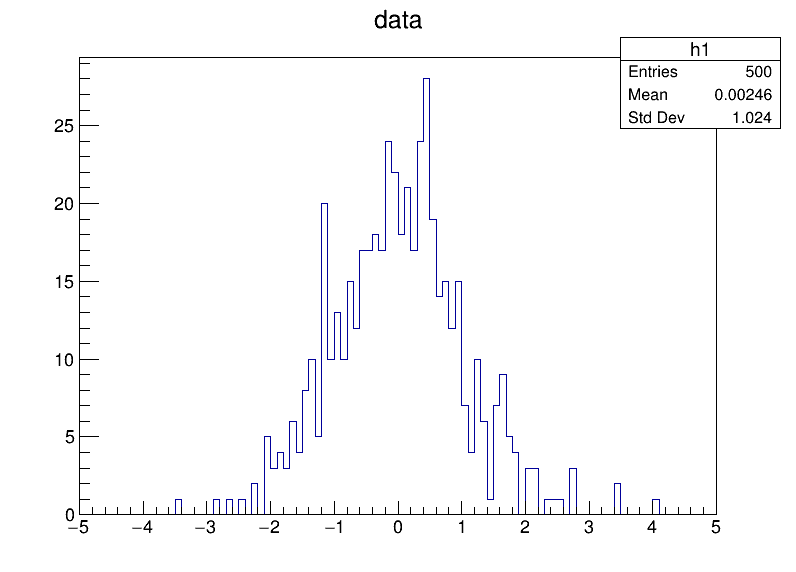

In [4]:
c = ROOT.TCanvas("canvas",";x;",800,600)
h1.Draw()
c.Draw()

## Fit options

- https://root.cern.ch/doc/master/classTH1.html#a7e7d34c91d5ebab4fc9bba3ca47dabdd

	option	fit options is given in parameter option.

    "W" Set all weights to 1 for non empty bins; ignore error bars
    "WW" Set all weights to 1 including empty bins; ignore error bars
    "I" Use integral of function in bin, normalized by the bin volume, instead of value at bin center
    "L" Use Loglikelihood method (default is chisquare method)
    "WL" Use Loglikelihood method and bin contents are not integer, i.e. histogram is weighted (must have Sumw2() set)
    "P" Use Pearson chi2 (using expected errors instead of observed errors)
    "U" Use a User specified fitting algorithm (via SetFCN)
    "Q" Quiet mode (minimum printing)
    "V" Verbose mode (default is between Q and V)
    "E" Perform better Errors estimation using Minos technique
    "B" User defined parameter settings are used for predefined functions like "gaus", "expo", "poln", "landau". Use this option when you want to fix one or more parameters for these functions.
    "M" More. Improve fit results. It uses the IMPROVE command of TMinuit (see TMinuit::mnimpr). This algorithm attempts to improve the found local minimum by searching for a better one.
    "R" Use the Range specified in the function range
    "N" Do not store the graphics function, do not draw
    "0" Do not plot the result of the fit. By default the fitted function is drawn unless the option"N" above is specified.
    "+" Add this new fitted function to the list of fitted functions (by default, any previous function is deleted)
    "C" In case of linear fitting, don't calculate the chisquare (saves time)
    "F" If fitting a polN, switch to minuit fitter
    "S" The result of the fit is returned in the TFitResultPtr (see below Access to the Fit Result)


### Neyman $\chi^{2}$ fit

In [5]:
f1 = ROOT.TF1("f1","gausn",-5,5)
f1.SetLineColor(ROOT.kBlue)
f1.SetParameters(100,0,1)

In [6]:
r1 = h1.Fit(f1,"S")

 FCN=63.9188 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.07993e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.42650e+01   2.12869e+00   8.33977e-03  -8.69465e-05
   2  Mean        -9.92461e-02   4.65236e-02   1.80040e-04  -9.10391e-03
   3  Sigma        9.13930e-01   4.74838e-02   6.28238e-05  -9.80933e-03


In [7]:
r1.Print()


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      63.9188
NDf                       =           50
Edm                       =  1.07993e-07
NCalls                    =           72
Constant                  =       44.265   +/-   2.12869     
Mean                      =   -0.0992461   +/-   0.0465236   
Sigma                     =      0.91393   +/-   0.0474838    	 (limited)


### Pearson $\chi^{2}$ fit

Using expected errors instead of observed errors.

In [8]:
f2 = ROOT.TF1("f2","gausn",-5,5)
f2.SetLineColor(ROOT.kBlue-3)
f2.SetParameters(100,0,1)

In [9]:
r2 = h1.Fit(f2,"P + S")

 FCN=104.966 FROM MIGRAD    STATUS=CONVERGED      90 CALLS          91 TOTAL
                     EDM=6.82357e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.52501e+01   2.34926e+00   1.16715e-02  -6.90537e-05
   2  Mean         8.61281e-02   5.20692e-02  -1.55056e-04  -3.27056e-03
   3  Sigma        1.20941e+00   2.95464e-02   2.64335e-05  -5.47277e-02


In [10]:
r2.Print()


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      104.966
NDf                       =           97
Edm                       =  6.82357e-08
NCalls                    =           91
Constant                  =      55.2501   +/-   2.34926     
Mean                      =    0.0861281   +/-   0.0520692   
Sigma                     =      1.20941   +/-   0.0295464    	 (limited)


### Binned likelihood fit

Use Loglikelihood method (default is chisquare method).

In [11]:
f3 = ROOT.TF1("f3","gausn",-5,5)
f3.SetLineColor(ROOT.kRed)
f3.SetParameters(100,0,1)

In [12]:
r3 = h1.Fit(f3,"L + S")

 FCN=48.9836 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=3.33384e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.99988e+01   2.23601e+00   1.08534e-02  -2.58225e-04
   2  Mean         3.60009e-03   4.56758e-02   2.21871e-04   2.40187e-10
   3  Sigma        1.02133e+00   3.23015e-02   5.12110e-05   4.34334e-05
                               ERR DEF= 0.5


In [13]:
r3.Print()


****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      48.9836
Chi2                      =       104.84
NDf                       =           97
Edm                       =  3.33384e-07
NCalls                    =           60
Constant                  =      49.9988   +/-   2.23601     
Mean                      =   0.00360009   +/-   0.0456758   
Sigma                     =      1.02133   +/-   0.0323015    	 (limited)


In [14]:
l = ROOT.TLegend(0.65,0.55,0.88,0.7)
l.AddEntry(f1,"Neyman chi2","l")
l.AddEntry(f2,"Person chi2","l")
l.AddEntry(f3,"Binned ML  ","l")

<ROOT.TLegendEntry object ("TLegendEntry") at 0x5490bf0>

## `RooWorkspace`

In [15]:
w = ROOT.RooWorkspace ("w")


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [16]:
w.factory("Gaussian:g(x[-5,5],mu[0,-10,10],sigma[1,0,1000])");
w.factory("ExtendPdf:model(g,nevt[100,0,100000])");   

In [17]:
pdf = w.pdf("model")
x = w.var("x")

In [18]:
arglist = ROOT.RooArgList(x)

In [19]:
data = ROOT.RooDataHist("data","data",arglist,h1)

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(data): fit range of variable x expanded to nearest bin boundaries: [-5,5] --> [-5,5]


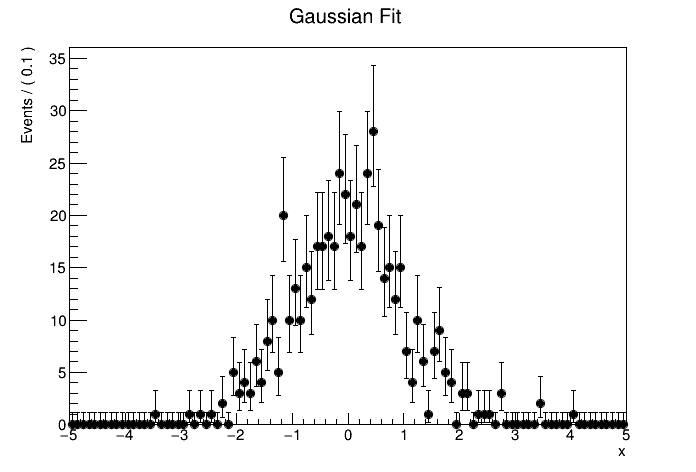

In [20]:
c = ROOT.TCanvas()
pl = x.frame(ROOT.RooFit.Title("Gaussian Fit"))
data.plotOn(pl)
pl.Draw()
c.Draw()

In [21]:
w.var("sigma").setVal(1)
w.var("mu").setVal(0)

In [22]:
r4 = pdf.fitTo(data, ROOT.RooFit.Minimizer("Minuit2","Migrad"), ROOT.RooFit.Save(1) ); 

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_model_FOR_OBS_x with 0 entries
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
MnSeedGenerator: for initial parameters FCN = -1482.341113043
MnSeedGenerator: Initial state:   - FCN =  -1482.341113043 Edm =      266.713 NCalls =     13
VariableMetric: start iterating until Edm is < 0.001
VariableMetric: Initial state   - FCN =  -1482.341113043 Edm =      266.713 NCalls =     13
VariableMetric: Iteration #   0 - FCN =  -1482.341113043 Edm =      266.713 NCalls =     13
VariableMetric: Iteration #   1 - FCN =  -1886.978163774 Edm =     0.172814 NCalls =     25
VariableMetric: Iteration #   2 - FCN =  -1887.277751025 Edm =   0.00863942 NCalls =     33
VariableMetric: Iteration #   3 - FCN 

Info in <Minuit2>: Minuit2Minimizer::Hesse : Hesse is valid - matrix is accurate


In [23]:
pdf.plotOn(pl)
pdf.paramOn(pl, ROOT.RooFit.Layout(0.6,0.9,0.85))

<ROOT.RooPlot object ("frame_x_7e61cf0") at 0x7e61cf0>

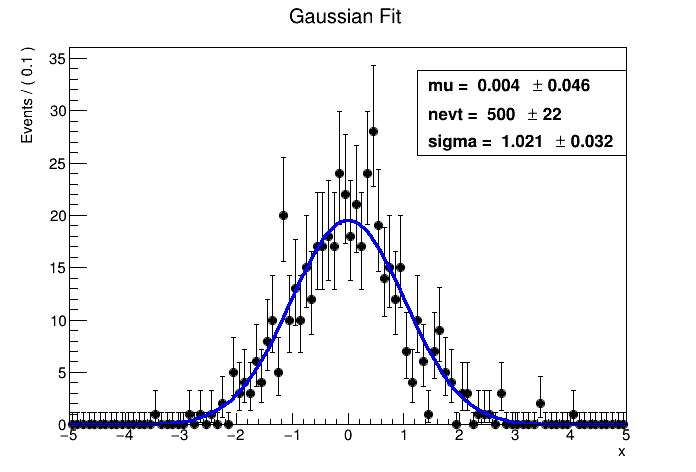

In [24]:
pl.Draw()
c.Draw()

In [25]:
getattr(w,'import')(data)

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data


In [26]:
w.Print()


RooWorkspace(w) w contents

variables
---------
(mu,nevt,sigma,x)

p.d.f.s
-------
RooGaussian::g[ x=x mean=mu sigma=sigma ] = 0.999994
RooExtendPdf::model[ pdf=g n=nevt ] = 0.999994

datasets
--------
RooDataHist::data(x)

named sets
----------



In [27]:
w.writeToFile("GaussianModel.root", True)

False